<a href="https://colab.research.google.com/github/yugpatelyp2/Image-Claccification-Fire-Vs-No-Fire-/blob/main/CE888_ImageClassification_InceptionV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Fire Vs No Fire Image Classification
1.   Data is Uploded in Google Drive which we need to mount in the colabs
2.   Below code is for use your data set directly form the Google drive



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#import the library's in Program which is already included in pytghon package.

#some of the Library file We need to import

In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/CE888 Fire Project/TrainData'
valid_path = '/content/drive/MyDrive/CE888 Fire Project/Test'

#Download the data from the Drive

In [ ]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 1s 0us/step


Creating the Layer and  we are not going to use our first and last layer

In [ ]:
for layer in inception.layers:
    layer.trainable = False

    x = Flatten()(inception.output)
folders = glob('/content/drive/MyDrive/CE888 Fire Project/TrainData/*')


hear we use activation funcation as softmax

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

we chack the modal summry by using this code

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

compile the model

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

augmenting and scaling the train and test data set

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

segmenting the data in the batch wise for train images

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/CE888 Fire Project/TrainData',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 39385 images belonging to 2 classes.


segmenting the data in the batch wise for test images

In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/CE888 Fire Project/Test',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 8617 images belonging to 2 classes.


Run the model and train the modal to classifay the images 

hear we define 2 epoch so its run in two round

In [ ]:
  r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=2,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/2
2462/2462 [==============================] - 17351s 7s/step - loss: 0.3930 - accuracy: 0.9694 - val_loss: 31.7540 - val_accuracy: 0.5885
Epoch 2/2
2462/2462 [==============================] - 534s 217ms/step - loss: 0.3255 - accuracy: 0.9892 - val_loss: 23.6370 - val_accuracy: 0.6472


import the librarys for visualize the data in graph

In [ ]:
import matplotlib.pyplot as plt

Structure the graph by the following the code and use the program output to reprasent in the graph 

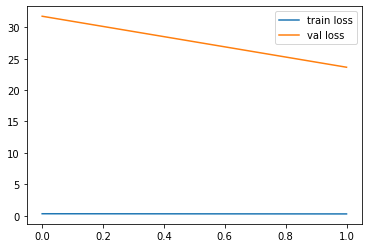

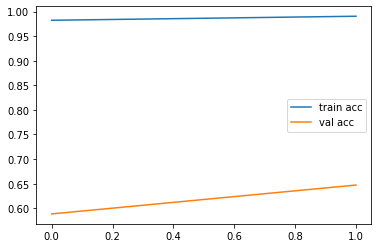

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

save the graph 

In [ ]:
from tensorflow.keras.models import load_model

model.save('model_inception.h5')

see our model metrics

In [ ]:
y_pred = model.predict(test_set)
print(y_pred)

[[1.0000000e+00 0.0000000e+00]
 [1.0000000e+00 2.0310068e-20]
 [1.0000000e+00 0.0000000e+00]
 ...
 [1.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00]]


In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

lest check the confusen metrics and classification report

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
testimages=8617
batch_size=16
Y_pred=model.predict_generator(test_set, testimages // batch_size+1 )
y_pred=np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_set.classes, y_pred))
print('Classification Report')
target_names=['Fire','No Fire']
print(classification_report(test_set.classes, y_pred, target_names=target_names))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
[[3857 1280]
 [2628  852]]
Classification Report
              precision    recall  f1-score   support

        Fire       0.59      0.75      0.66      5137
     No Fire       0.40      0.24      0.30      3480

    accuracy                           0.55      8617
   macro avg       0.50      0.50      0.48      8617
weighted avg       0.52      0.55      0.52      8617



In [ ]:
img_data=load_model('model_inception.h5')

In [ ]:
img_data

In [ ]:
x.shape

TensorShape([None, 51200])

In [ ]:
x=x/255